In [67]:
import pandas as pd
import numpy as np
import pandas
import requests
import json
import matplotlib.pyplot as plt

In [68]:
baseurl = 'https://www.omdbapi.com/?t='
show = 'Mr+Robot'
key = '&apikey=80cd6e0'

def mainrequest(baseurl, show, season_url, key):
    r = requests.get(baseurl + show + season_url + key)
    return(r.json())

# Create an empty list to store the data
data_list = []

# Loop through all seasons
for season in range(1, 5):
    # Add the season number to the URL
    season_url = '&season={}'.format(season)
    data = mainrequest(baseurl, show, season_url, key)

    # Check if the request was successful
    if data['Response'] == 'True':
        # Add the data to the list
        data_list.append(data)

# Create a dataframe from the list
df = pd.DataFrame(data_list)


episodes_list = df['Episodes']

# Create an empty list to store the dataframes
df_list = []

# Loop through the episodes list and create a dataframe for each episode
for episode in episodes_list:
    # Convert the dictionary to a dataframe
    df_episode = pd.DataFrame(episode)

    # Add the dataframe to the list
    df_list.append(df_episode)

In [69]:
df_dict = {}

# Loop through the list of dataframes
for i, df in enumerate(df_list):
    # Add the dataframe to the dictionary with a key corresponding to the season number
    df_dict[f'season_{i+1}'] = df

In [63]:
# Split dictionarie in 4 different dataframs
season1_df = df_dict['season_1']
season2_df = df_dict['season_2']
season3_df = df_dict['season_3']
season4_df = df_dict['season_4']

# Converting imdbRating to Float
season1_dff = season1_df.copy()
season1_dff['imdbRating'] = season1_dff['imdbRating'].astype(float)
season2_dff = season2_df.copy()
season2_dff['imdbRating'] = season2_dff['imdbRating'].astype(float)
season3_dff = season3_df.copy()
season3_dff['imdbRating'] = season3_dff['imdbRating'].astype(float)
season4_dff = season4_df.copy()
season4_dff['imdbRating'] = season4_dff['imdbRating'].astype(float)

# Joining again the 4 dataframes
result_df = pd.concat([season1_dff, season2_dff, season3_dff, season4_dff], keys=['season1', 'season2', 'season3', 'season4'], axis=0)



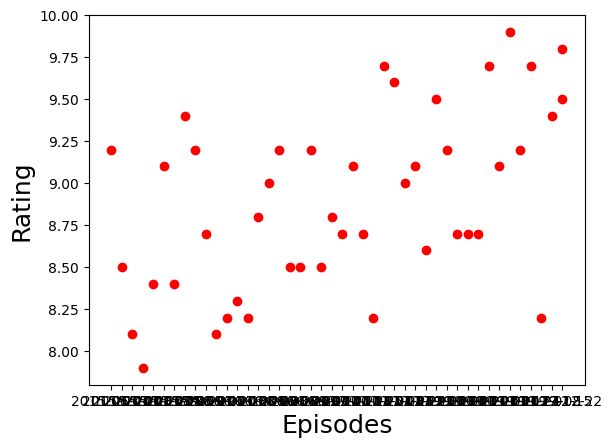

In [71]:
%matplotlib inline
plt.xlabel('Episodes', fontsize=18)
plt.ylabel('Rating', fontsize=18)
plt.scatter(result_df.Released, result_df.imdbRating, color='Red')
